In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import draw

C:\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
def preprocess_image(filename):
    bgr_image       = cv2.imread(filename)
    rgb_image       = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    gray_image      = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    _, binary_image = cv2.threshold(gray_image, 210, 255, cv2.THRESH_BINARY)
    binary_image    = binary_image/255
    
    return binary_image, gray_image

In [3]:
# points is a starting coordinate --> [y,x]
def count_pixel(binary_image, points):
    y = points[0]
    x = points[1]
    no_of_pixels = 0
    
    while binary_image[y,x] == 1:
        y += 1
        no_of_pixels += 1
    
    return no_of_pixels

In [35]:
def find_boundary_coord(inversed_heights):
    return UPPER_BOUNDS_CAM1[:,0] + inversed_heights

In [4]:
def height_inverse(binary_image, starting_points):
    heights = []
    for points in starting_points:
        height = count_pixel(binary_image, points)
        heights.append(height)
    
    return np.array(heights)

In [5]:
# inverse_height has to be a numpy array
def actual_height(inversed_height):
    return 302-inversed_height

In [6]:
def pixel_to_mm(value):
    return value*0.828

In [30]:
cam1_points = [[90,200], [72,400], [70,600], [75,800], [82,1000]]     # 5 points

# approximation
UPPER_BOUNDS_CAM1 = [[90,200], [85,225], [82,250], [80,275], 
                     [78,300], [75,325], [73,350], [73,375],
                     [72,400], [71,425], [71,450], [71,475],
                     [70,500], [70,525], [70,550], [70,575],
                     [70,600], [70,625], [70,650], [70,675],
                     [70,700], [70,725], [70,750], [70,775],
                     [75,800], [73,825], [75,850], [76,875],
                     [77,900], [78,925], [78,950], [81,975],
                     [82,1000],]

cam1_points = np.array(cam1_points)
UPPER_BOUNDS_CAM1 = np.array(UPPER_BOUNDS_CAM1)

In [34]:
UPPER_BOUNDS_CAM1[:,0]

array([90, 85, 82, 80, 78, 75, 73, 73, 72, 71, 71, 71, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 75, 73, 75, 76, 77, 78, 78, 81, 82])

In [22]:
binary_image, gray_image = preprocess_image('CCFL002_1_2000_500_up_cam1_a_post.jpg')
heights = height_inverse(binary_image, UPPER_BOUNDS_CAM1)
heights = actual_height(heights)
heights = pixel_to_mm(heights)

In [23]:
heights

array([42.228, 38.916, 34.776, 33.12 , 43.884, 39.744, 38.088, 30.636,
       26.496, 19.872, 14.076,  9.108,  7.452,  9.936,  9.936,  9.108,
       13.248, 18.216, 18.216, 24.84 , 28.98 , 25.668, 10.764, 11.592,
       14.076, 16.56 , 20.7  , 21.528, 33.948, 32.292, 24.012, 20.7  ,
       17.388])

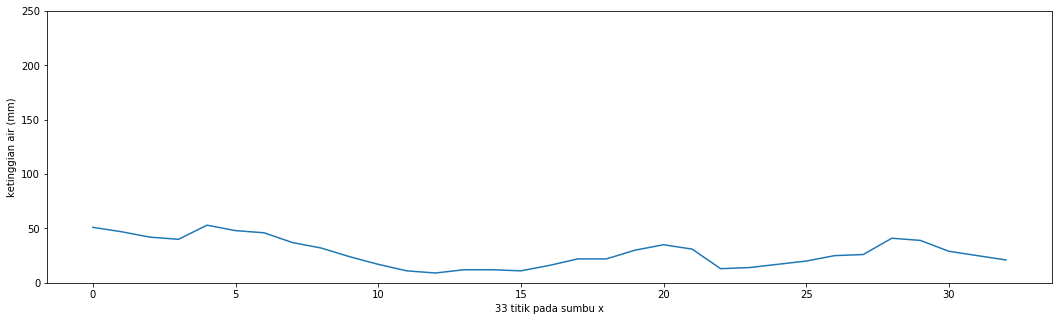

In [14]:
plt.figure(figsize=(18,5))
plt.ylim([0,250])
plt.ylabel('ketinggian air (mm)')
plt.xlabel('33 titik pada sumbu x')
plt.plot(heights)

In [17]:
binary_image, gray_image = preprocess_image('CCFL002_1_2000_500_up_cam1_a_pre.jpg')
heights = height_inverse(binary_image, upper_bounds_cam1)
heights = actual_height(heights)
heights = pixel_to_mm(heights)

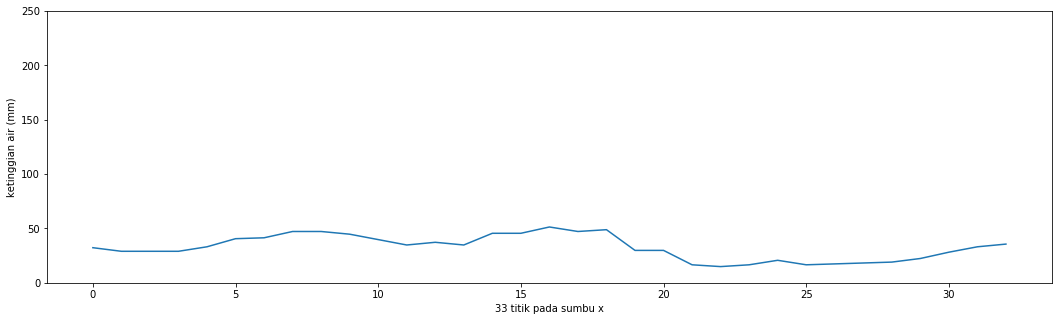

In [18]:
plt.figure(figsize=(18,5))
plt.ylim([0,250])
plt.ylabel('ketinggian air (mm)')
plt.xlabel('33 titik pada sumbu x')
plt.plot(heights)

In [ ]:
rrs0, ccs0, vals0 = 